
# **Contents:**


## **What will do:**

1. Use calculus and the chain rule to calculate partial derivatives e.g. $\frac{dL}{dw}$
2. Write a function that calculates partial derivatives
3. Adjust random inital weights to better approximate the $\sin(x)$ function
4. write the stocastic gradient descent optimizer from scratch


## **Stuff we will learn about:**

1. How do neural networks learn?
2. What is gradient descent?
  - getting stuck in local minima and maxima?
3. What does the optimizer do?
4. Hyperparameters:
  - Learning rate $\alpha$
  - Batch size
  - number of epochs

# **Recap and Jargon**




## *Jargon*


*   Neural network parameters: Matricies of weights and biases
*   Activation function: A non-linear function that adds non-linarity to the network
*   Loss function: error function that measures peroformance of the network
  - This is the the function that the network learns to minimise through training
*   Training: finding weights and biases that minimise the loss function
* Supervised learning: fitting neural network parameters such that the outputs of the neural network match the desired outputs



## **Neural networks are linear matrix multiplications with non-linear activation functions**


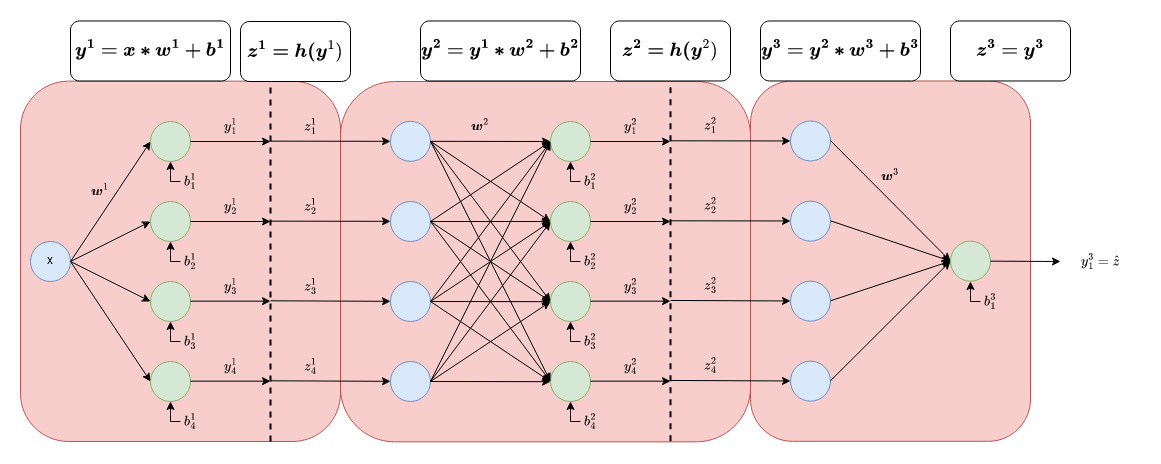


**Layer$^\boldsymbol{1}$ parameters**


$w^1 = \begin{bmatrix}
w_1^1 \\ w_2^1 \\ w_3^1 \\ w_4^1
\end{bmatrix}$

$b^1 = \begin{bmatrix}
b_1^1 \\ b_2^1 \\ b_3^1 \\ b_4^1
\end{bmatrix}$

**Layer$^\boldsymbol{2}$ parameters**



$w^2 = \begin{bmatrix}
w_{11}^2 & w_{12}^2 & w_{13}^2 & w_{14}^2 \\
w_{21}^2 & w_{22}^2 & w_{23}^2 & w_{24}^2 \\
w_{31}^2 & w_{32}^2 & w_{33}^2 & w_{34}^2 \\
w_{41}^2 & w_{42}^2 & w_{43}^2 & w_{44}^2 \\
\end{bmatrix}$

$b^1 = \begin{bmatrix}
b_1^2 \\ b_2^2 \\ b_3^2 \\ b_4^2
\end{bmatrix}$

**Layer$^\boldsymbol{3}$ parameters**

$w^3 = \begin{bmatrix}
w_1^3 & w_2^3 & w_3^3 & w_4^3
\end{bmatrix}$

$b^3 = \begin{bmatrix}
b_1^3
\end{bmatrix}$


In [ ]:
import numpy as np

w1 = np.random.random(4).reshape((1,4))
b1 = np.zeros((1, 4))

w2 = np.random.random(16).reshape((4,4))
b2 = np.zeros((1, 4))

w3 = np.random.random(4).reshape((4, 1))
b3 = np.zeros((1, 1))



# **Gradient Descent theory**


The gradient is pointing in the direction of increasing y, if we want to decrease y we simply move in the opposite direction.


As an algorihtm:

1.   initialise x randomly.
2.   calculate $\frac{dy}{d\text{x}}$.
3.   update the value of x to:  x  $\leftarrow \text{x} - \alpha\frac{d\text{y}}{d\text{x}}$.
4.    Calculate current value of y.
5.    if y $\geq \text{y}_{\text{target}}$ repeat steps 2-5.

Where $\alpha$ is a step size factor $\alpha \; \epsilon \; (0, 1]$




### **Gradient Descent Example: y=x^2**



consider $y=x^2$, then $\frac{dy}{dx}=2x$

Imagine our starting point is x = 2, then y = 4.

**The goal is to find the value of x that minimises y**

inital conditions: $x_0 = 2,\; \alpha= 0.1,\; y_{target} = 0.01$

step 2-> $\frac{dy}{dx} = 4$

step 3 -> $x_1 = 2-0.1*4=1.6$

step 4 -> $y_1=x_1^2=2.56$

step 5 -> $y_1<y_{target}\;?\;\;\;\;\;\times$ repeat from step 2

-----------------------------------------------------------------

step 2 -> $\frac{dy}{dx} = 3.2$

step 3 -> $x_{2} = 1.6- 0.1*3.2 = 1.28$

step 4 -> $y_2=x_2^2=1.6384$

step 5 -> $y_2<y_{target}\;?\;\;\;\;\;\times$ repeat from step 2

----------------------------------------------------------------

etc. We can see that we are slowly decreasing y.

In [ ]:
import numpy as np

def get_dydx(x):
  return 2*x

#parameters
x0 = 2.0
alpha = 0.1
y_target = 0.01

#set inital conditions
y=x0**2
x=x0
print("starting value of x:{} and y: {}, dydx: {}".format(x,y, 2*x))

loop_counter = 0
while True:
  dydx=get_dydx(x)

  x = x - alpha*dydx

  y = x**2

  print("Current value of x:{}, y: {}, and dydx: {}".format(f'{x:.3}',f'{y:.3}',f'{dydx:.3}'))

  if (y<y_target):
    print("Found value of x: {} that minimises y: {} sufficiently".format(x,y))
    break

  if loop_counter>100:
    print("this isnt getting anywhere!")
    break
  else:
    loop_counter = loop_counter +1


starting value of x:2.0 and y: 4.0, dydx: 4.0
Current value of x:1.6, y: 2.56, and dydx: 4.0
Current value of x:1.28, y: 1.64, and dydx: 3.2
Current value of x:1.02, y: 1.05, and dydx: 2.56
Current value of x:0.819, y: 0.671, and dydx: 2.05
Current value of x:0.655, y: 0.429, and dydx: 1.64
Current value of x:0.524, y: 0.275, and dydx: 1.31
Current value of x:0.419, y: 0.176, and dydx: 1.05
Current value of x:0.336, y: 0.113, and dydx: 0.839
Current value of x:0.268, y: 0.0721, and dydx: 0.671
Current value of x:0.215, y: 0.0461, and dydx: 0.537
Current value of x:0.172, y: 0.0295, and dydx: 0.429
Current value of x:0.137, y: 0.0189, and dydx: 0.344
Current value of x:0.11, y: 0.0121, and dydx: 0.275
Current value of x:0.088, y: 0.00774, and dydx: 0.22
Found value of x: 0.08796093022208001 that minimises y: 0.007737125245533629 sufficiently


### **Re run the cell below with differnt values of alpha, x0 and y_target**

try

alpha = 0.2, 0.8, 1

x0 = 0.5, 1, 2 , 20

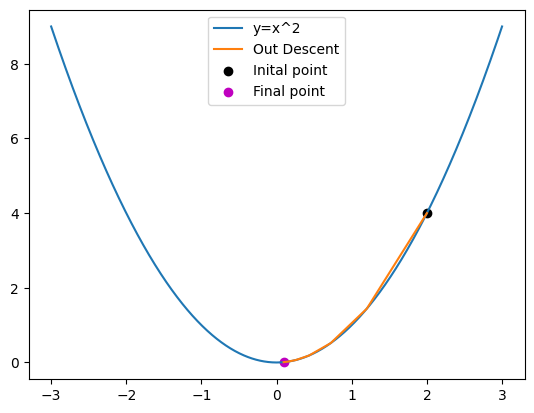

In [ ]:
#making a nice plot
alpha = 0.2
x0 = 2.0

x=x0
y=x0**2

x_plot = [x]
y_plot = [y]

loop_counter=0
while True:
  dydx=get_dydx(x)
  x = x - alpha*dydx
  y = x**2
  x_plot.append(x)
  y_plot.append(y)

  if (y<y_target):
    break

  if loop_counter>1000:
    print("this isnt getting anywhere!")
    break
  else:
    loop_counter = loop_counter +1

from matplotlib import pyplot as plt

x_range = np.linspace(-int(max(x,x0))-1,int(max(x,x0))+1,1000)
plt.plot(x_range, x_range**2, label="y=x^2")
plt.plot(x_plot, y_plot, label="Out Descent")
plt.scatter(x0,x0**2,label="Inital point",c="k")
plt.scatter(x,x**2,label="Final point", c="m")
plt.legend()
plt.rcParams["figure.figsize"] = (8,6)
plt.show()

# **Local Minima and the dreaded optimizer**

consider trying gradient descent on $y=x^4 - 5 x^3 + 7 x^2 - x + 1$ with $x_0 = 2.5$, $y_{target}=1.7$

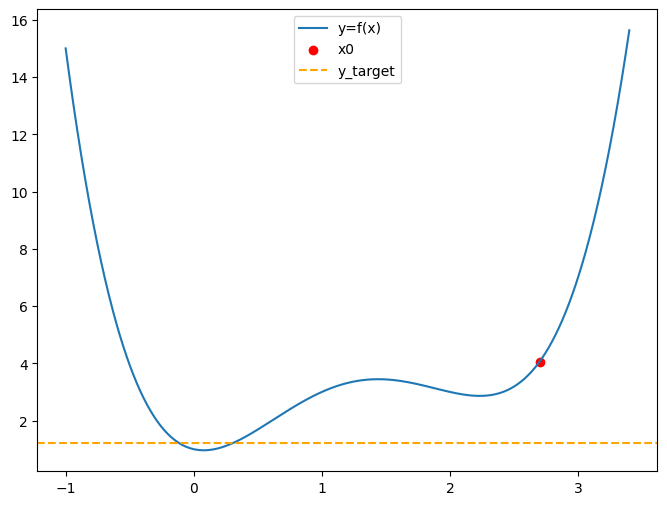

In [ ]:
get_y = lambda x: x**4 - 5*x**3 + 7*x**2 - x + 1

x_points = np.linspace(-1, 3.4, 1000)

plt.plot(x_points, get_y(x_points),label="y=f(x)")
plt.scatter(2.7, get_y(2.7),c="r", label="x0")
plt.axhline(1.2, linestyle="--",c="orange",label="y_target")
plt.legend()
plt.show()


starting value of x:2.7 and y: 4.06
Current value of x:2.64, y: 3.71, and dydx: 6.18
Current value of x:2.59, y: 3.49, and dydx: 4.98
Current value of x:2.55, y: 3.33, and dydx: 4.11
Current value of x:2.51, y: 3.22, and dydx: 3.45
Current value of x:2.48, y: 3.14, and dydx: 2.93
Current value of x:2.46, y: 3.08, and dydx: 2.52
Current value of x:2.44, y: 3.04, and dydx: 2.19
Current value of x:2.42, y: 3.0, and dydx: 1.92
Current value of x:2.4, y: 2.98, and dydx: 1.69
Current value of x:2.39, y: 2.96, and dydx: 1.5
Current value of x:2.37, y: 2.94, and dydx: 1.34
Current value of x:2.36, y: 2.93, and dydx: 1.19
Current value of x:2.35, y: 2.92, and dydx: 1.07
Current value of x:2.34, y: 2.91, and dydx: 0.967
Current value of x:2.33, y: 2.9, and dydx: 0.874
Current value of x:2.32, y: 2.89, and dydx: 0.792
Current value of x:2.32, y: 2.89, and dydx: 0.719
this isnt getting anywhere!


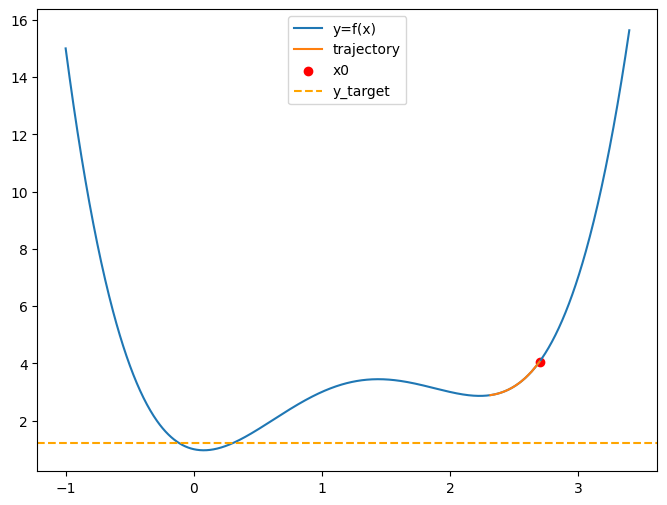

In [ ]:
def get_y(x):
  return x**4 - 5*x**3 + 7*x**2 - x + 1

def get_dydx(x):
  return 4*(x**3) - 15*(x**2) + 14*x -1


def fit(y_target=1.2,x0=2.5, alpha=0.3):
  #set starting values
  y=get_y(x0)
  x=x0
  print("starting value of x:{} and y: {}".format(x,f'{y:.3}'))

  #store values for plots
  x_plot = [x0]
  y_plot = [get_y(x0)]

  loop_counter = 0
  while True:
    dydx=get_dydx(x)
    x = x - alpha*dydx
    y = get_y(x)

    print("Current value of x:{}, y: {}, and dydx: {}".format(f'{x:.3}',f'{y:.3}',f'{dydx:.3}'))

    #store values for plots
    x_plot.append(x)
    y_plot.append(y)


    if (y<y_target):
      print("Found value of x: {} that minimises y: {} sufficiently".format(f'{x:.3}',f'{y:.3}'))
      break

    if loop_counter>15:
      print("this isnt getting anywhere!")
      break
    else:
      loop_counter = loop_counter +1

  #making a nice plot
  x_points = np.linspace(-1, 3.4, 1000)
  plt.plot(x_points, get_y(x_points),label="y=f(x)")
  plt.plot(x_plot, y_plot, label="trajectory")
  plt.scatter(x0, get_y(x0),c="r", label="x0")
  plt.axhline(y_target, linestyle="--",c="orange",label="y_target")
  plt.legend()
  plt.show()



#Trt the following (x0,alpha) combinations [(2.7, 0.4), (2.7, 0.3), (2.7, 0.2), (2.7, 0.1), (3, 0.01)]
fit(x0=2.7, alpha=0.01)

## **The optimizer**

Notice how differnt values of the stepsize could make us either find the true minimum, or get stuck in a local minima, or even cause us to completely diverge from the minimum point

*    is responsible for scheduling the stepsize e.g. how much do we update the neural network parameters on each iteration
*    In deeplearning the stepsize is called the "learning rate"
*    What we have done so far is almost exactly Stocastic Gradient Descent (SGD)
  -  The part we are missing is that SGD looks at multiple points at once rather than a single point at a time
  -  The number of points considered at a time is the batch_size!
  -  We have been using SGD with a batch size of 1. e.g. we look at 1 point at a time


*    We could consider the momentum e.g. we allow moving in a direction that increases the loss up until we reach the same height we did before.
  - this is called SGD with momentum


# **Gradient Descent for a single data point in $\sin(2\pi x)$**



**Our Network:**

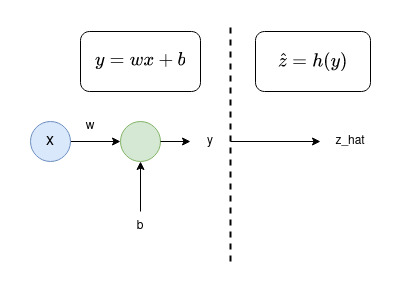


**We do the exact same thing as we did before: just now $y=L$ and instead of 1 x parameter we are trying to tune 2 parameters: w, b**


loss function: $L = (z-\hat{z})^2$

activation function: $\hat{z} = h(y) = \frac{1}{1+e^{-y}}$

linear part: $y = w*x +b$

**First we need to calculate a formula for the partial derivatives**

$\frac{dL}{dw} = \frac{dL}{d\hat{z}} * \frac{d\hat{z}}{dy} * \frac{dy}{dw}$

$\frac{dL}{db} = \frac{dL}{d\hat{z}} * \frac{d\hat{z}}{dy} * \frac{dy}{db}$

This has 4 partial derivatives: $\frac{dL}{d\hat{z}}$, $\frac{d\hat{z}}{dy}$, $\frac{dy}{dw}$, $\frac{dy}{db}$

$\frac{dL}{d\hat{z}}$ = $-2(z-\hat{z})$

$\frac{d\hat{z}}{dy} = \frac{1}{1+e^{-y}}*(1 - \frac{1}{1+e^{-y}}) = h(y)*(1-h(y))$

$\frac{dy}{dw} = x$


$\frac{dy}{db} = 1$


**Finally:**

$\frac{dL}{dw} = -2(z-\hat{z})*h(y)*(1-h(y))*x$

$\frac{dL}{db} = -2(z-\hat{z})*h(y)*(1-h(y))$

In [ ]:
import numpy as np

def sigmoid(y):
  return 1/(1+np.exp(-y))

def SE(z, z_hat):
  return (z-z_hat)**2

#changing to L, h notation
h=sigmoid
L=SE

#create a dataset of 1 point
x = 0.25 # so that we are asking for sin(pi/2) which is 1
z_true = np.sin(2*np.pi*x)

#set our stepsize parameter
alpha=1

#set the weight to be some random number and the bias to 0
w0 = np.random.random()
b0 = 0.0

w=w0
b=b0
print("The inital value of the weight is: {}, the inital value of the bias is: {}".format(f'{w:.3}', f'{b:.3}'))


y = w*x+b
z_hat = h(y)
print("For x = {}, y = {} and then z = {}, the actual value of sin(pi/2) is {}".format(x, f'{y:.3}',f'{z_hat:.3}', z_true))

print("This gives a means squared loss of :{}".format(f'{L(z_true, z_hat):.3}'))



The inital value of the weight is: 0.49, the inital value of the bias is: 0.0
For x = 0.25, y = 0.123 and then z = 0.531, the actual value of sin(pi/2) is 1.0
This gives a means squared loss of :0.22


In [ ]:
def calc_dLdw(z, z_hat, y, x):
  dLdw = -2*(z-z_hat)*h(y)*(1-h(y))*x
  return dLdw

def calc_dLdb(z, z_hat, y):
  dLdb = -2*(z-z_hat)*h(y)*(1-h(y))
  return dLdb

#calculate the partial derivatives
dLdw = calc_dLdw(z_true, z_hat, y, x)
dLdb = calc_dLdb(z_true, z_hat, y)

#update the weights and biases of the network so as to minimise the loss
w = w-alpha*dLdw
b = b-alpha*dLdb

#print new values of weight and bias
print("The new value of the weight is: {}, the new value of the bias is: {}".format(f'{w:.3}', f'{b:.3}'))

#calculate the new y approximation using the new value of the weight and bias
y = w*x+b
z_hat = h(y)
print("For x = {}, y = {} and then z = {}".format(x, f'{y:.3}',f'{z_hat:.3}'))

print("This gives a new mean squared loss of :{}".format(f'{L(z_true, z_hat):.3}'))
print("OMG ITS LESS")



The new value of the weight is: 0.549, the new value of the bias is: 0.234
For x = 0.25, y = 0.371 and then z = 0.592
This gives a new mean squared loss of :0.167
OMG ITS LESS


### **We can stick this into a for loop to repeatebly minimise the loss**

In [ ]:
#reset w and b
w = w0
b = b0

num_epochs = 40

for epoch in range(num_epochs):
  #calculate z,y
  y = w*x+b
  z_hat = h(y)


  #calculate the partial derivatives
  dLdw = calc_dLdw(z_true, z_hat,y,x)
  dLdb = calc_dLdb(z_true, z_hat,y)

  #update the weights and biases of the network so as to minimise the loss
  w = w-alpha*dLdw
  b = b-alpha*dLdb

  print("Epoch: {}, Loss:{:.3f}, b: {:.3f}, w: {:.3f}".format(epoch,L(z_true, z_hat), b, w))
  #print("b: {:.3f}, w: {:.3f}".format(b, w))


print("Final values of w:{:.3f} and b:{:.3f}".format(w, b))

Epoch: 0, Loss:0.220, b: 0.234, w: 0.549
Epoch: 1, Loss:0.167, b: 0.431, w: 0.598
Epoch: 2, Loss:0.129, b: 0.596, w: 0.639
Epoch: 3, Loss:0.102, b: 0.735, w: 0.674
Epoch: 4, Loss:0.083, b: 0.853, w: 0.704
Epoch: 5, Loss:0.069, b: 0.956, w: 0.729
Epoch: 6, Loss:0.059, b: 1.045, w: 0.751
Epoch: 7, Loss:0.051, b: 1.124, w: 0.771
Epoch: 8, Loss:0.045, b: 1.194, w: 0.789
Epoch: 9, Loss:0.040, b: 1.258, w: 0.805
Epoch: 10, Loss:0.036, b: 1.315, w: 0.819
Epoch: 11, Loss:0.032, b: 1.368, w: 0.832
Epoch: 12, Loss:0.029, b: 1.417, w: 0.844
Epoch: 13, Loss:0.027, b: 1.462, w: 0.856
Epoch: 14, Loss:0.025, b: 1.504, w: 0.866
Epoch: 15, Loss:0.023, b: 1.543, w: 0.876
Epoch: 16, Loss:0.021, b: 1.580, w: 0.885
Epoch: 17, Loss:0.020, b: 1.614, w: 0.894
Epoch: 18, Loss:0.019, b: 1.647, w: 0.902
Epoch: 19, Loss:0.018, b: 1.677, w: 0.910
Epoch: 20, Loss:0.017, b: 1.707, w: 0.917
Epoch: 21, Loss:0.016, b: 1.734, w: 0.924
Epoch: 22, Loss:0.015, b: 1.761, w: 0.930
Epoch: 23, Loss:0.014, b: 1.786, w: 0.937
Ep

### **Notes on what we have just done**

*   We have not actually learnt to fit the $\sin(2\pi x)$ function we are only fitting 1 point.
*   The sigmoid function is not a suitable activation function for this problem
    *   $\hat{z} \in  (0, 1)$  negative values not possible in the output
- $\hat{z} \rightarrow 1.0$ as $w, b\rightarrow∞$



# **Now lets add more parameters to our network**

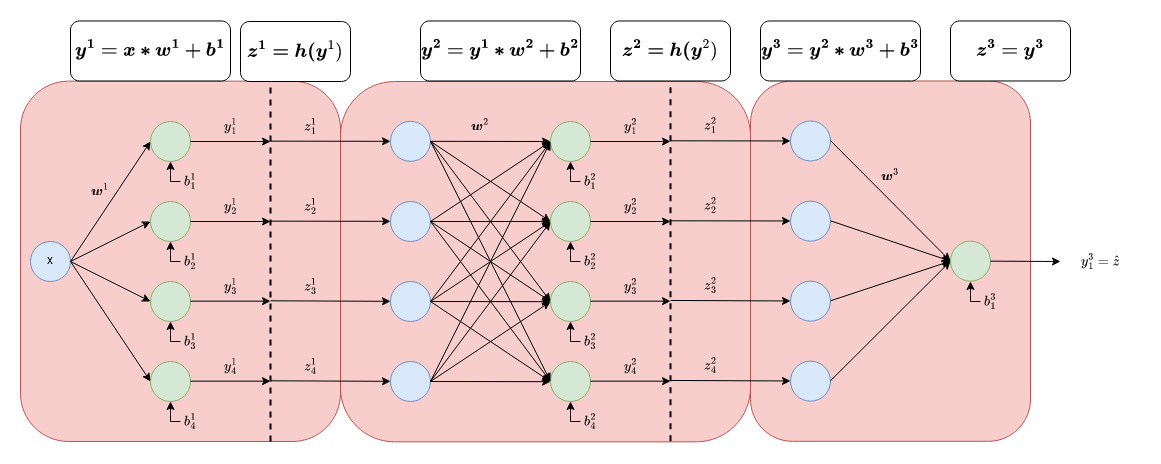


**Layer$^\boldsymbol{1}$ parameters**


$w^1 = \begin{bmatrix}
w_1^1 \\ w_2^1 \\ w_3^1 \\ w_4^1
\end{bmatrix}$

$b^1 = \begin{bmatrix}
b_1^1 \\ b_2^1 \\ b_3^1 \\ b_4^1
\end{bmatrix}$

**Layer$^\boldsymbol{2}$ parameters**



$w^2 = \begin{bmatrix}
w_{11}^2 & w_{12}^2 & w_{13}^2 & w_{14}^2 \\
w_{21}^2 & w_{22}^2 & w_{23}^2 & w_{24}^2 \\
w_{31}^2 & w_{32}^2 & w_{33}^2 & w_{34}^2 \\
w_{41}^2 & w_{42}^2 & w_{43}^2 & w_{44}^2 \\
\end{bmatrix}$

$b^1 = \begin{bmatrix}
b_1^2 \\ b_2^2 \\ b_3^2 \\ b_4^2
\end{bmatrix}$

**Layer$^\boldsymbol{3}$ parameters**

$w^3 = \begin{bmatrix}
w_1^3 & w_2^3 & w_3^3 & w_4^3
\end{bmatrix}$

$b^3 = \begin{bmatrix}
b_1^3
\end{bmatrix}$


**Layer 1 forward pass**

$y^1 = w^1*x+b^1$

$z^1 = h^1(y^1) = Relu(y^1)$

**Layer 2 forward pass**

$y^2 = w^2*z^1+b^2$

$z^2 = h^2(y^2) = Relu(y^2)$

**Layer 3 forward pass**

$y^3 = w^3*z^2+b^3$

$z^3 = h^3(y^3) = \tanh(y^3)$

**Loss function**

$L = (z-\hat{z})^2$

**Gradient Descent**

$\delta^L =-2*(z-\hat{z})$

$\delta^i = (w^{i+1})^T\delta^{i+1}\odot \frac{dh^i}{dy^i}(w^i)$

$\frac{dL}{dw^i} = \delta^i*(z^{i-1})^T$

$\frac{dL}{db^i} = \delta^i$


**Update rule**
(essentially the same as its always been)

$w_i = w_i-\alpha * \frac{dL}{dw^i}$

$b_i = b_i-\alpha * \frac{dL}{db^i}$

for more details see: https://medium.com/analytics-vidhya/backpropagation-for-dummies-e069410fa585


### **activation and loss function**

In [ ]:
import numpy as np

def tanh(x):
  return np.tanh(x)

def ReLu(x):           #relu function
  return np.maximum(0, x)

def dtan_dx(x):
  return 1- (np.tanh(x))**2

def dReLu_dx(x):
  p = x
  p[p<=0.0] = 0.0   # set all values less than 0 to 0
  p[p>0.0] = 1.0    # set all values greater than 0 to 1
  return p

def SE(z, z_hat):     #squared error
  return (z-z_hat)**2

def dSE_dz_hat(z, z_hat):
  return -2*(z-z_hat)


### **Creating the Neural Network**

In [ ]:

np.random.seed(2)
#Initialise First layer parameters ,and activation function
w1_0 = np.random.random(4).reshape((4, 1))
b1_0 = np.zeros((4,1))
h1 = ReLu
get_dh1_dy1 = dReLu_dx

#Initialise Second layer parameters and activation function
w2_0 = np.random.random(4*4).reshape((4, 4))
b2_0 = np.zeros((4,1))
h2 = ReLu
get_dh2_dy2 = dReLu_dx

#Initialise Third layer parameters and activation function
w3_0 = np.random.random(4).reshape((1, 4))
b3_0 = np.zeros((1,1))
h3 = tanh
get_dh3_dy3 = dtan_dx

#foward pass function e.g. h(x*w +b)
get_y = lambda x, w, b: np.matmul(w, x)+b


## **Training on a single data point at a time (batch size = 1)**

In [ ]:
#create a dataset
num_points = 1024
x_dataset = np.linspace(0, 1, num_points) # x data points
np.random.shuffle(x_dataset)
z_true_dataset = np.sin(x_dataset*2*np.pi)  # z true points we want to approximate

In [ ]:
#define a stepsize
alpha      = 0.1

#set up weights and biases for this training
w1 = w1_0
b1 = b1_0
w2 = w2_0
b2 = b2_0
w3 = w3_0
b3 = b3_0

#define loss function
L = SE
get_dL_dz3 = dSE_dz_hat

#numbert of times to iterate over dataset
num_epochs = 100

for epoch in range(num_epochs):

  loss_dataset = 0
  for x, z_true in zip(x_dataset, z_true_dataset):
    y1 = get_y(np.array([[x]]), w1, b1)
    z1 = h1(y1)
    y2 = get_y(z1, w2, b2)
    z2 = h2(y2)
    y3 = get_y(z2, w3, b3)
    z3 = h3(y3)
    loss = L(z_true, z3)

    dL_dz3  = get_dL_dz3(z_true, z3)
    dz3_dy3 = get_dh3_dy3(y3)
    dz2_dy2 = get_dh2_dy2(y2)
    dz1_dy1 = get_dh2_dy2(y2)

    delta_3 = np.matmul(dL_dz3,dz3_dy3)
    delta_2 = np.multiply(np.matmul(w3.T, delta_3), dz2_dy2)
    delta_1 = np.multiply(np.matmul(w2.T, delta_2), dz1_dy1)

    dL_dw3 = np.matmul(delta_3, z2.T)
    dL_dw2 = np.matmul(delta_2, z1.T)
    dL_dw1 = np.matmul(delta_1, [[x]])

    w1 = w1 - alpha*dL_dw1
    b1 = b1 - alpha*delta_1
    w2 = w2 - alpha*dL_dw2
    b2 = b2 - alpha*delta_2
    w3 = w3 - alpha*dL_dw3
    b3 = b3 - alpha*delta_3
    loss_dataset += loss[0, 0]

  print("epoch: {}, loss: {:.4f}".format(epoch, loss_dataset/num_points))


epoch: 0, loss: 0.2260
epoch: 1, loss: 0.1008
epoch: 2, loss: 0.0911
epoch: 3, loss: 0.0899
epoch: 4, loss: 0.0890
epoch: 5, loss: 0.0892
epoch: 6, loss: 0.1497
epoch: 7, loss: 0.2519
epoch: 8, loss: 1.4469
epoch: 9, loss: 0.3080
epoch: 10, loss: 0.1650
epoch: 11, loss: 0.1268
epoch: 12, loss: 0.1168
epoch: 13, loss: 0.0743
epoch: 14, loss: 0.0526
epoch: 15, loss: 0.0498
epoch: 16, loss: 0.0478
epoch: 17, loss: 0.0462
epoch: 18, loss: 0.0447
epoch: 19, loss: 0.0440
epoch: 20, loss: 0.0435
epoch: 21, loss: 0.0430
epoch: 22, loss: 0.0426
epoch: 23, loss: 0.0422
epoch: 24, loss: 0.0420
epoch: 25, loss: 0.0418
epoch: 26, loss: 0.0415
epoch: 27, loss: 0.0413
epoch: 28, loss: 0.0411
epoch: 29, loss: 0.0408
epoch: 30, loss: 0.0406
epoch: 31, loss: 0.0404
epoch: 32, loss: 0.0402
epoch: 33, loss: 0.0401
epoch: 34, loss: 0.0399
epoch: 35, loss: 0.0398
epoch: 36, loss: 0.0397
epoch: 37, loss: 0.0396
epoch: 38, loss: 0.0395
epoch: 39, loss: 0.0394
epoch: 40, loss: 0.0393
epoch: 41, loss: 0.0392
ep

0.03447699409079367


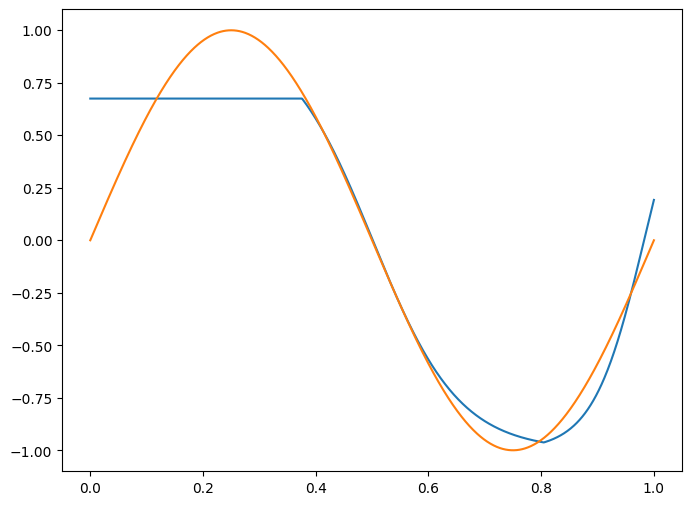

In [ ]:
from matplotlib import pyplot as plt

#create a test dataset
num_points = 1024
x_test = np.linspace(0, 1, num_points).reshape((1, num_points)) # x data points
z_test = np.sin(x_test*2*np.pi)  # z true points we want to approximate

y1 = get_y(x_test, w1, b1)
z1 = h1(y1)
y2 = get_y(z1, w2, b2)
z2 = h2(y2)
y3 = get_y(z2, w3, b3)
z3 = h3(y3)
loss = L(z_test, z3)

print(np.mean(loss))

z_predictions = z3

plt.plot(x_test[0], z_predictions[0])
plt.plot(x_test[0], z_test[0])
plt.show()



### **Verifying using tensorflow**

Epoch 1/100
1024/1024 [==============================] - 2s 2ms/step - loss: 0.1208
Epoch 2/100
1024/1024 [==============================] - 2s 2ms/step - loss: 0.0895
Epoch 3/100
1024/1024 [==============================] - 2s 2ms/step - loss: 0.0896
Epoch 4/100
1024/1024 [==============================] - 2s 2ms/step - loss: 0.0886
Epoch 5/100
1024/1024 [==============================] - 2s 2ms/step - loss: 0.0889
Epoch 6/100
1024/1024 [==============================] - 2s 2ms/step - loss: 0.0886
Epoch 7/100
1024/1024 [==============================] - 2s 2ms/step - loss: 0.0887
Epoch 8/100
1024/1024 [==============================] - 2s 2ms/step - loss: 0.0885
Epoch 9/100
1024/1024 [==============================] - 2s 2ms/step - loss: 0.0883
Epoch 10/100
1024/1024 [==============================] - 2s 2ms/step - loss: 0.0893
Epoch 11/100
1024/1024 [==============================] - 2s 2ms/step - loss: 0.0903
Epoch 12/100
1024/1024 [==============================] - 2s 2ms/step - lo

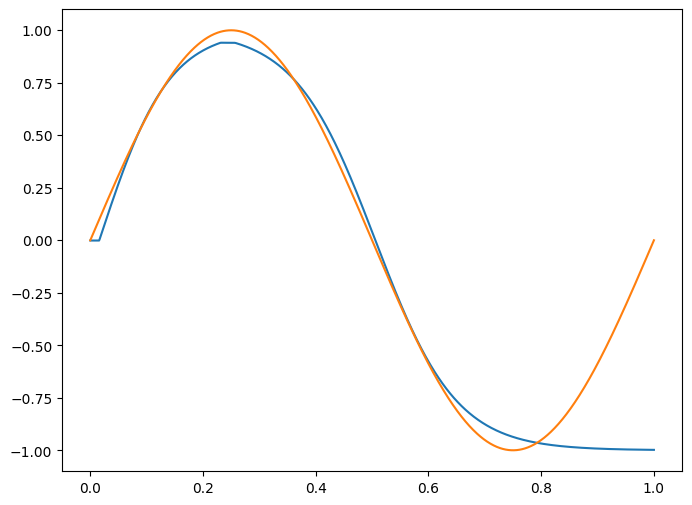

In [ ]:
from tensorflow import keras

#build network
model_sin = keras.Sequential([keras.layers.Input(1,),
                              keras.layers.Dense(4, activation='relu'),
                              keras.layers.Dense(4, activation='relu'),
                              keras.layers.Dense(1, activation="tanh")])

# loss function and optimizer
loss_func   = keras.losses.MeanSquaredError()
optiimizer  = keras.optimizers.SGD(learning_rate = alpha)

# initalises the weights and biases of the mode
model_sin.compile(loss=loss_func, optimizer=optiimizer)

# Train model
model_sin.fit(x=x_dataset, y=z_true_dataset, epochs=num_epochs, batch_size=1)

#test
z_predictions_keras = model_sin(x_test[0,:])

#make a pretty plot
plt.plot(x_test[0], z_predictions_keras)
plt.plot(x_test[0],z_test[0])
plt.show()

## **Taking the average gradient of a set of points (batchsize > 1)**

So far we have been calculating the gradient for every point in the dataset individually. We then applied the gradient update as required for that point and then repeated for the next point in the dataset. This is problematic as it is a high varienance update, especially if there is noise in the dataset.

Analagy: Imagine you are in a forign city and you need to find your hotel. You ask a stranger on the street for directions. You follow his directions for a short period and then ask the next stranger and follow his directions. Every stranger gives you a direction even if they dont know exactly where your hotel is. You would end up walking around back and fourth for a long time and may even fail to get to your hotel all together. **Instead** you could ask a group of people and then follow the average direction indicated by the group. Doing this you would be much more likely to find your hotel. Though this comes at the cost of having to ask multiple people (a group) in order to take a single step. This is analgous to the batch size parameter. Rather than calculating the gradient for every point and apply gradient update for each point you instead calculate the average gradient for a batch size amount of points and then apply this average gradient instead.

### This requires modifiyng the loss function.
The input to the loss function will now be a vector with number of elements equal to the batch size and the loss function must calculate the mean loss of this batch:
$L =\frac{1}{n}\sum\limits_{i=1}^{n}(z-\hat{z})^2$

In [ ]:
def MSE(z, z_hat):     #squared error
  return np.array([[np.mean((z-z_hat)**2)]])

def dMSE_dz_hat(z, z_hat):
  return np.array([[-2*np.mean((z-z_hat))]])

In [ ]:
# define a stepsize
batch_size = 32

# split the dataset into batchs
x_dataset_batched = np.split(x_dataset, num_points/batch_size)
z_true_dataset_batch = np.split(z_true_dataset, num_points/batch_size)

In [ ]:
#define loss function
L = MSE
get_dL_dz3 = dMSE_dz_hat

#set up weights and biases for this training
w1 = w1_0
b1 = b1_0
w2 = w2_0
b2 = b2_0
w3 = w3_0
b3 = b3_0
#fit() loop
for epoch in range(num_epochs*int(num_points/batch_size)):

  loss_dataset = 0
  for x, z_true in zip(x_dataset_batched, z_true_dataset_batch):
    y1 = get_y(np.array([x]), w1, b1)
    z1 = h1(y1)
    y2 = get_y(z1, w2, b2)
    z2 = h2(y2)
    y3 = get_y(z2, w3, b3)
    z3 = h3(y3)
    loss = L(z_true, z3)

    dL_dz3  = get_dL_dz3(z_true, z3)
    dz3_dy3 = get_dh3_dy3(y3)
    dz2_dy2 = get_dh2_dy2(y2)
    dz1_dy1 = get_dh2_dy2(y2)

    delta_3 = np.matmul(dL_dz3, dz3_dy3)
    delta_2 = np.multiply(np.matmul(w3.T, delta_3), dz2_dy2)
    delta_1 = np.multiply(np.matmul(w2.T, delta_2), dz1_dy1)

    dL_dw3 = np.matmul(delta_3, z2.T)
    dL_dw2 = np.matmul(delta_2, z1.T)
    dL_dw1 = np.matmul(delta_1, np.array([x]).T)

    w1 = w1 - alpha*dL_dw1
    b1 = b1 - alpha*np.array([np.mean(delta_1, axis=1)]).T
    w2 = w2 - alpha*dL_dw2
    b2 = b2 - alpha*np.array([np.mean(delta_2, axis=1)]).T
    w3 = w3 - alpha*dL_dw3
    b3 = b3 - alpha*np.array([np.mean(delta_3, axis=1)]).T
    loss_dataset += loss[0, 0]

  print("epoch: {}, loss: {:.4f}".format(epoch, (loss_dataset/(num_points/batch_size))))


In [ ]:
x_test_batched = x_test

y1 = get_y(x_test_batched, w1, b1)
z1 = h1(y1)
y2 = get_y(z1, w2, b2)
z2 = h2(y2)
y3 = get_y(z2, w3, b3)
z3 = h3(y3)
loss = L(z_test, z3)

print(loss[0, 0])

z_predictions = z3

plt.plot(x_test[0], z_predictions[0])
plt.plot(x_test[0],z_test[0])
plt.show()


# **Vanishing gradient problem**

## **vanishing Gradient task**

### **Use the chain rule to find an expression for the  partial derivative of $L(z_5)$ w.r.t $w_1$ in terms of of partial derivtaives for:**

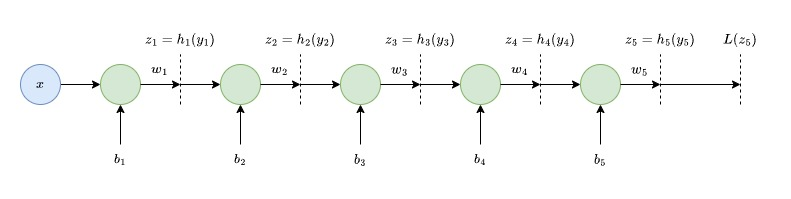


### **Answer:**




$\frac{dL}{dw_1} = \frac{dL}{dz_5}*\frac{dz_5}{dy_5}*\frac{dy_5}{dz_4}*\frac{dz_4}{dy_3}*\frac{dy_3}{dz_2}*\frac{dz_2}{dy_1}*\frac{dy_1}{dw_1}$

**with:**

$\frac{dz_i}{dy_i} = \frac{dh_i}{dy_i}$    (e.g. derivative of activation function)

$\frac{dy_i}{dz_{i-1}} = w_i$

$\frac{dy_i}{dw_{i}} = z_{i-1}$ with case for input: $\frac{dy_1}{dw_{1}} = x$

**Putting it all together:**

$\frac{dL}{dw_1} = \frac{dL}{dz_5}*\frac{dh_5}{dy_5}*w_5*\frac{dh_4}{dy_4}*w_4*\frac{dh_3}{dy_3}*w_3*\frac{dh_2}{dy_2}*w_2*x$

$\;\;\;\;\;\;\;= \frac{dL}{dz_5} * \prod\limits_{i=2}^5(\frac{dh_i}{dy_i}*w_i)*x$

**Generally: $w<1$ and $\frac{dh_i}{dy_i}<1$**

**As the number of layers increases the gradient fades to 0, drastically slowing or preventing training**


# **MNIST Dataset for grand written figure classifcation**

### **The Dataset**

In [ ]:
from tensorflow import keras
from keras.datasets import mnist
from matplotlib import pyplot as plt
import numpy as np

(x_train, y_train), (x_test, y_test) = mnist.load_data()

plt.imshow(x_train[0])

print("each image is 28 pixels by 28 pixels")
print("Here is the top left corner of the image")
print(x_train[0][0:14,0:14])
#print(y_train[0])

### **One hot encoding:**

In [ ]:
print("The first training image shows a: {}".format(y_train[0]))


y_train_onehot = np.zeros((y_train.shape[0], 10))
for i in range(y_train.shape[0]):
  y_train_onehot[i, y_train[i]] = 1

print("new encoding:")
print(y_train_onehot[0])

print("the shape of the labels is now: {}".format(y_train_onehot.shape))


### **Building the network**

In [ ]:
MNIST_model = keras.Sequential([keras.Input((28, 28)),
                               keras.layers.Flatten(),
                               keras.layers.Dense(64, activation="relu"),
                               keras.layers.Dense(64, activation="relu"),
                               keras.layers.Dense(10, activation="softmax") # 1 neuron per possible digit, e.g. 0-9
                                ])

### **Training**

In [ ]:
loss_func = keras.losses.CategoricalCrossentropy()
optiimizer=keras.optimizers.Adam()

MNIST_model.compile(loss=loss_func, optimizer=optiimizer)#initalises the weights and biases of the model
MNIST_model.fit(x=x_train, y=y_train_onehot, epochs=10, batch_size=64)


### **Testing**

In [ ]:
example = np.empty((1, 28, 28))
example[0] = x_test[0]
plt.imshow(example[0])
print(MNIST_model(example))
print("Network beleives this is a: {}".format(np.argmax(MNIST_model(example))))

In [ ]:
def make_confu_mat(predictions, true_values):
  confu_mat = np.zeros((10, 10), dtype=np.int16)

  num_correct = 0
  for i in range(true_values.shape[0]):
    confu_mat[np.argmax(predictions[i]), true_values[i]] += 1
    if np.argmax(predictions[i]) == true_values[i]:
      num_correct += 1
  print(confu_mat)
  print("number of correct predicitons: {} out of: {}, accuracy: {}%".format(num_correct, true_values.shape[0],  num_correct/true_values.shape[0]))

print("training data performance is :")
make_confu_mat(MNIST_model(x_train), y_train)
print("-------------------------------------")
print("testing data performance is :")
make_confu_mat(MNIST_model(x_test), y_test)

# **Summary**

*  We can move in the opposite direction of the gradient to decrease a function
*  This allows neural networks to approximate functions that are unknown through samples of the function in the form of a dataset
*  Neural networks learn via gradient descent
*  The size of the step taken in the direction of the gradient is extremely important
  - this parameter is known as the learning rate
  - the optimizer is responsible for scheduling learning rate
    - e.g. applying momentum or different step sizes for different layers
*  The batch size is the number of items in the dataset that are considered simultaneously to calculate the gradient of a single step

# **Luca's rules of thumb**


*   Optimizer: Use the Adam optmizer with a learning rate of $\alpha = 1\times 10^{-3}$
*   Loss function:
  * Classification problem: $\rightarrow$ Categorical Cross enthalpy
  * Regression problem: $\rightarrow$ Mean Squared Error
*  Activation function:
  * Interal layer: $\rightarrow$ Relu
  * Output layer:
    * Output is probability: $\rightarrow$ softmax
    * Output is any real number: $\rightarrow$ dont need to use an activation function
      * Optionally if output needs to be limited to (0, 1): $\rightarrow$ sigmoid
      * Optionally if output needs to be limited to (-1, 1): $\rightarrow$ tanh
*  Number of layers:
  * Dense layer: $\rightarrow$ 2 to 4 dense layers in a row.
  * Convolutional layers: $\rightarrow$ situational
*  Number of neurons per layer: depends on your input/output dimensions and difficulty of task
  * Generally from input to output the number of neurons are: $\rightarrow$ increasing, then constant, then decreasing to required output dimensions.
